In [64]:
from gensim.models import word2vec, Word2Vec, Doc2Vec, KeyedVectors
from gensim.models.doc2vec import Doc2Vec, TaggedDocument, LabeledSentence
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import numpy as np
import re
import time
import jobs
import topic_model

# Import the built-in logging module and configure it so that Word2Vec 
# creates nice output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

In [11]:
# Get job postings, vectorizer, token generator
df_jobs = jobs.get_job_posting_data()
print df_jobs.shape
docs = df_jobs.description[0:20000]
docs = df_jobs.description

min_df=20
max_vocab_size=5000
dim_size=500
ngram_range=(1, 1)

vectorizer = TfidfVectorizer(token_pattern=topic_model.get_token_pattern(),
                                              min_df=min_df,
                                              max_features=max_vocab_size,
                                              stop_words=topic_model.get_stop_words(),
                                              ngram_range=ngram_range)

docgen = topic_model.TokenGenerator_skl(vectorizer, docs, topic_model.get_stop_words())
docgen

Getting job posting data...
- Time: 0.598479032516

(24015, 5)


<topic_model.TokenGenerator_skl instance at 0x7fdaaa4b15f0>

In [12]:
# from gensim.models.word2vec import Word2Vec as w2v2
from gensim.models import Word2Vec as w2v
w2v_model = w2v()
type(w2v_model)

gensim.models.word2vec.Word2Vec

In [13]:
# Process w2v with model of n dimensions and min doc-term freq as min_df
t1 = time.time()
w2v_model = Word2Vec(docgen, 
                     sg=1, 
                     min_count=min_df,
                     max_vocab_size=max_vocab_size,
                     size=dim_size)                 # size: the word vector dimensionality (same as max_vocal_size?)
print "- Time: %0.3fs." % (time.time() - t1)

2018-01-08 01:21:07,053 : INFO : collecting all words and their counts
2018-01-08 01:21:07,056 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-01-08 01:21:07,164 : INFO : pruned out 0 tokens with count <=1 (before 5001, after 5001)
2018-01-08 01:21:07,172 : INFO : pruned out 1999 tokens with count <=2 (before 5004, after 3005)
2018-01-08 01:21:07,252 : INFO : pruned out 2075 tokens with count <=3 (before 5010, after 2935)


Tokenizing the documents...


2018-01-08 01:21:07,327 : INFO : pruned out 2204 tokens with count <=4 (before 5030, after 2826)
2018-01-08 01:21:07,423 : INFO : pruned out 2181 tokens with count <=5 (before 5025, after 2844)
2018-01-08 01:21:07,499 : INFO : pruned out 2272 tokens with count <=6 (before 5022, after 2750)
2018-01-08 01:21:07,584 : INFO : pruned out 2335 tokens with count <=7 (before 5025, after 2690)
2018-01-08 01:21:07,680 : INFO : pruned out 2267 tokens with count <=8 (before 5010, after 2743)
2018-01-08 01:21:07,830 : INFO : pruned out 2195 tokens with count <=9 (before 5004, after 2809)
2018-01-08 01:21:07,915 : INFO : pruned out 2249 tokens with count <=10 (before 5002, after 2753)
2018-01-08 01:21:07,986 : INFO : pruned out 2323 tokens with count <=11 (before 5030, after 2707)
2018-01-08 01:21:08,056 : INFO : pruned out 2367 tokens with count <=12 (before 5030, after 2663)
2018-01-08 01:21:08,126 : INFO : pruned out 2472 tokens with count <=13 (before 5091, after 2619)
2018-01-08 01:21:08,199 : 

2018-01-08 01:21:15,100 : INFO : pruned out 2520 tokens with count <=87 (before 5008, after 2488)
2018-01-08 01:21:15,198 : INFO : pruned out 2524 tokens with count <=88 (before 5011, after 2487)
2018-01-08 01:21:15,275 : INFO : pruned out 2517 tokens with count <=89 (before 5001, after 2484)
2018-01-08 01:21:15,360 : INFO : pruned out 2527 tokens with count <=90 (before 5008, after 2481)
2018-01-08 01:21:15,507 : INFO : pruned out 2527 tokens with count <=91 (before 5007, after 2480)
2018-01-08 01:21:15,620 : INFO : pruned out 2577 tokens with count <=92 (before 5057, after 2480)
2018-01-08 01:21:15,697 : INFO : pruned out 2530 tokens with count <=93 (before 5007, after 2477)
2018-01-08 01:21:15,771 : INFO : PROGRESS: at sentence #20000, processed 2076095 words, keeping 4777 word types
2018-01-08 01:21:15,783 : INFO : pruned out 2529 tokens with count <=94 (before 5006, after 2477)
2018-01-08 01:21:15,853 : INFO : pruned out 2551 tokens with count <=95 (before 5027, after 2476)
2018-0

Tokenizing the documents...


2018-01-08 01:21:18,546 : INFO : PROGRESS: at 0.50% examples, 54645 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:21:19,616 : INFO : PROGRESS: at 1.16% examples, 60876 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:21:20,653 : INFO : PROGRESS: at 2.00% examples, 65707 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:21:21,705 : INFO : PROGRESS: at 2.78% examples, 66257 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:21:22,849 : INFO : PROGRESS: at 3.48% examples, 66243 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:21:23,810 : INFO : PROGRESS: at 4.08% examples, 67439 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:21:24,830 : INFO : PROGRESS: at 4.90% examples, 67484 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:21:25,942 : INFO : PROGRESS: at 5.76% examples, 67272 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:21:27,114 : INFO : PROGRESS: at 6.54% examples, 66688 words/s, in_qsize 0, out_qsize 1
2018-01-08 01:21:28,235 : INFO : PROGRESS: at 7.36% examples, 66889 words/s, in_qsize 0, ou

Tokenizing the documents...


2018-01-08 01:21:47,063 : INFO : PROGRESS: at 20.48% examples, 67531 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:21:48,345 : INFO : PROGRESS: at 21.14% examples, 67028 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:21:49,381 : INFO : PROGRESS: at 21.95% examples, 67301 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:21:50,551 : INFO : PROGRESS: at 22.81% examples, 67280 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:21:51,660 : INFO : PROGRESS: at 23.57% examples, 67470 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:21:52,693 : INFO : PROGRESS: at 24.17% examples, 67603 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:21:53,885 : INFO : PROGRESS: at 25.04% examples, 67297 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:21:54,933 : INFO : PROGRESS: at 25.93% examples, 67506 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:21:55,966 : INFO : PROGRESS: at 26.65% examples, 67460 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:21:57,157 : INFO : PROGRESS: at 27.50% examples, 67372 words/s, in_q

Tokenizing the documents...


2018-01-08 01:22:15,497 : INFO : PROGRESS: at 40.09% examples, 67145 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:22:16,613 : INFO : PROGRESS: at 40.70% examples, 67099 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:22:17,657 : INFO : PROGRESS: at 41.43% examples, 67259 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:22:18,678 : INFO : PROGRESS: at 42.29% examples, 67276 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:22:19,680 : INFO : PROGRESS: at 42.92% examples, 67194 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:22:20,871 : INFO : PROGRESS: at 43.65% examples, 67254 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:22:21,986 : INFO : PROGRESS: at 44.41% examples, 67333 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:22:23,109 : INFO : PROGRESS: at 45.43% examples, 67360 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:22:24,183 : INFO : PROGRESS: at 46.18% examples, 67316 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:22:25,285 : INFO : PROGRESS: at 46.92% examples, 67350 words/s, in_q

Tokenizing the documents...


2018-01-08 01:22:44,723 : INFO : PROGRESS: at 60.41% examples, 67349 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:22:45,837 : INFO : PROGRESS: at 61.07% examples, 67303 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:22:46,921 : INFO : PROGRESS: at 61.86% examples, 67384 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:22:47,964 : INFO : PROGRESS: at 62.69% examples, 67358 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:22:48,997 : INFO : PROGRESS: at 63.27% examples, 67284 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:22:50,014 : INFO : PROGRESS: at 63.89% examples, 67378 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:22:51,030 : INFO : PROGRESS: at 64.64% examples, 67393 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:22:52,037 : INFO : PROGRESS: at 65.54% examples, 67414 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:22:53,149 : INFO : PROGRESS: at 66.30% examples, 67365 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:22:54,253 : INFO : PROGRESS: at 67.02% examples, 67377 words/s, in_q

Tokenizing the documents...


2018-01-08 01:23:13,821 : INFO : PROGRESS: at 80.55% examples, 67396 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:23:14,792 : INFO : PROGRESS: at 81.19% examples, 67423 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:23:15,806 : INFO : PROGRESS: at 81.91% examples, 67371 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:23:16,905 : INFO : PROGRESS: at 82.78% examples, 67403 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:23:18,109 : INFO : PROGRESS: at 83.54% examples, 67397 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:23:19,217 : INFO : PROGRESS: at 84.14% examples, 67405 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:23:20,362 : INFO : PROGRESS: at 85.11% examples, 67407 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:23:21,443 : INFO : PROGRESS: at 85.90% examples, 67380 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:23:22,521 : INFO : PROGRESS: at 86.62% examples, 67351 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:23:23,525 : INFO : PROGRESS: at 87.45% examples, 67425 words/s, in_q

- Time: 154.461s.


In [15]:
# https://www.kaggle.com/c/word2vec-nlp-tutorial#part-2-word-vectors

# Set values for various parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

print "Training model..."
t1 = time.time()
# model = word2vec.Word2Vec(docs, workers=num_workers, \
w2v_model = Word2Vec(docgen, 
                     workers=num_workers, 
                     size=num_features, 
                     min_count=min_word_count, 
                     window=context, 
                     sample=downsampling)
print "- Time: %0.3fs." % (time.time() - t1)

2018-01-08 01:28:28,022 : INFO : collecting all words and their counts
2018-01-08 01:28:28,029 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


Training model...
Tokenizing the documents...


2018-01-08 01:28:32,152 : INFO : PROGRESS: at sentence #10000, processed 1053228 words, keeping 29264 word types
2018-01-08 01:28:36,158 : INFO : PROGRESS: at sentence #20000, processed 2076095 words, keeping 41027 word types
2018-01-08 01:28:37,700 : INFO : collected 44932 word types from a corpus of 2464662 raw words and 24015 sentences
2018-01-08 01:28:37,701 : INFO : Loading a fresh vocabulary
2018-01-08 01:28:37,733 : INFO : min_count=40 retains 5908 unique words (13% of original 44932, drops 39024)
2018-01-08 01:28:37,734 : INFO : min_count=40 leaves 2277822 word corpus (92% of original 2464662, drops 186840)
2018-01-08 01:28:37,826 : INFO : deleting the raw counts dictionary of 44932 items
2018-01-08 01:28:37,833 : INFO : sample=0.001 downsamples 8 most-common words
2018-01-08 01:28:37,834 : INFO : downsampling leaves estimated 2268460 word corpus (99.6% of prior 2277822)
2018-01-08 01:28:37,837 : INFO : estimated required memory for 5908 words and 300 dimensions: 17133200 bytes

Tokenizing the documents...


2018-01-08 01:28:38,991 : INFO : PROGRESS: at 1.16% examples, 139101 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:28:40,020 : INFO : PROGRESS: at 2.57% examples, 140059 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:28:41,050 : INFO : PROGRESS: at 3.73% examples, 141366 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:28:42,055 : INFO : PROGRESS: at 5.11% examples, 142430 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:28:43,058 : INFO : PROGRESS: at 6.49% examples, 142848 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:28:44,077 : INFO : PROGRESS: at 7.82% examples, 142707 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:28:45,122 : INFO : PROGRESS: at 8.67% examples, 143945 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:28:46,135 : INFO : PROGRESS: at 10.00% examples, 143976 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:28:47,184 : INFO : PROGRESS: at 11.42% examples, 144430 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:28:48,208 : INFO : PROGRESS: at 12.90% examples, 144234 words/s, i

Tokenizing the documents...


2018-01-08 01:28:54,297 : INFO : PROGRESS: at 20.66% examples, 143985 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:28:55,327 : INFO : PROGRESS: at 21.95% examples, 143796 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:28:56,339 : INFO : PROGRESS: at 23.27% examples, 143811 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:28:57,365 : INFO : PROGRESS: at 24.45% examples, 143879 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:28:58,402 : INFO : PROGRESS: at 25.93% examples, 143669 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:28:59,429 : INFO : PROGRESS: at 27.23% examples, 143532 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:00,488 : INFO : PROGRESS: at 28.33% examples, 143728 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:01,494 : INFO : PROGRESS: at 29.37% examples, 143850 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:02,505 : INFO : PROGRESS: at 30.78% examples, 143510 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:03,525 : INFO : PROGRESS: at 32.03% examples, 143507 wor

Tokenizing the documents...


2018-01-08 01:29:10,663 : INFO : PROGRESS: at 41.19% examples, 143369 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:11,701 : INFO : PROGRESS: at 42.65% examples, 143256 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:12,727 : INFO : PROGRESS: at 43.81% examples, 143312 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:13,753 : INFO : PROGRESS: at 45.23% examples, 143294 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:14,814 : INFO : PROGRESS: at 46.62% examples, 143347 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:15,853 : INFO : PROGRESS: at 47.92% examples, 143257 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:16,907 : INFO : PROGRESS: at 48.82% examples, 143434 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:17,924 : INFO : PROGRESS: at 50.19% examples, 143454 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:18,919 : INFO : PROGRESS: at 51.53% examples, 143514 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:19,964 : INFO : PROGRESS: at 52.99% examples, 143414 wor

Tokenizing the documents...


2018-01-08 01:29:26,083 : INFO : PROGRESS: at 60.75% examples, 143344 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:27,084 : INFO : PROGRESS: at 62.03% examples, 143371 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:28,102 : INFO : PROGRESS: at 63.36% examples, 143386 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:29,125 : INFO : PROGRESS: at 64.54% examples, 143413 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:30,139 : INFO : PROGRESS: at 66.03% examples, 143403 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:31,156 : INFO : PROGRESS: at 67.30% examples, 143381 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:32,212 : INFO : PROGRESS: at 68.35% examples, 143478 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:33,217 : INFO : PROGRESS: at 69.45% examples, 143533 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:34,236 : INFO : PROGRESS: at 70.94% examples, 143536 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:35,276 : INFO : PROGRESS: at 72.24% examples, 143474 wor

Tokenizing the documents...


2018-01-08 01:29:41,433 : INFO : PROGRESS: at 80.31% examples, 143473 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:42,489 : INFO : PROGRESS: at 81.52% examples, 143533 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:43,500 : INFO : PROGRESS: at 82.92% examples, 143537 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:44,525 : INFO : PROGRESS: at 84.08% examples, 143572 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:45,549 : INFO : PROGRESS: at 85.59% examples, 143546 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:46,551 : INFO : PROGRESS: at 86.84% examples, 143560 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:47,559 : INFO : PROGRESS: at 88.06% examples, 143591 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:48,568 : INFO : PROGRESS: at 88.97% examples, 143629 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:49,589 : INFO : PROGRESS: at 90.38% examples, 143619 words/s, in_qsize 0, out_qsize 0
2018-01-08 01:29:50,604 : INFO : PROGRESS: at 91.65% examples, 143630 wor

- Time: 88.873s.


In [16]:
# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

2018-01-08 01:31:10,244 : INFO : precomputing L2-norms of word weight vectors


In [17]:
# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "300features_40minwords_10context"
model.save(model_name)

2018-01-08 01:31:12,874 : INFO : saving Word2Vec object under 300features_40minwords_10context, separately None
2018-01-08 01:31:12,879 : INFO : not storing attribute syn0norm
2018-01-08 01:31:12,881 : INFO : not storing attribute cum_table
2018-01-08 01:31:12,936 : INFO : saved 300features_40minwords_10context


In [18]:
model.wv.vocab
model.doesnt_match("bar kitchen specialist deli".split())

'specialist'

In [30]:
t1 = time.time()
goog_news_w2v_model = KeyedVectors.load_word2vec_format('../model/GoogleNews-vectors-negative300.bin', binary=True)
print '- Time: %s' % (time.time() - t1)

2018-01-08 01:46:40,213 : INFO : loading projection weights from ../model/GoogleNews-vectors-negative300.bin
2018-01-08 01:47:41,886 : INFO : loaded (3000000, 300) matrix from ../model/GoogleNews-vectors-negative300.bin


- Time: 64.4013569355


In [31]:
print len(goog_news_w2v_model.vocab)
t1 = time.time()
print goog_news_w2v_model.most_similar(positive=['server', 'bar'], negative=['CPU'], topn=10)
print '- Time: %s' % (time.time() - t1)

2018-01-08 01:48:05,708 : INFO : precomputing L2-norms of word weight vectors


3000000
[(u'tavern', 0.5487228631973267), (u'bartender', 0.5428971648216248), (u'restaurant', 0.5355651378631592), (u'pub', 0.5140328407287598), (u'bars', 0.5019227266311646), (u'Bar', 0.5018932819366455), (u'restuarant', 0.4939461350440979), (u'caf\xe9', 0.48689597845077515), (u'cafe', 0.48496049642562866), (u'drinkery', 0.4809538424015045)]
- Time: 6.96264314651


/home/ec2-user/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family [u'xkcd', u'Humor Sans', u'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


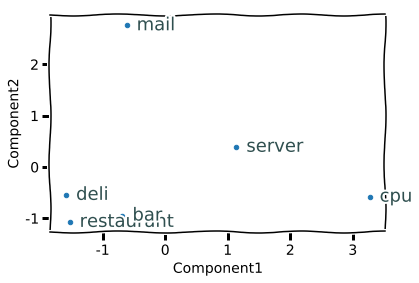

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from sklearn.decomposition import PCA

def plot_words(words):
    word_vecs = [goog_news_w2v_model[word] for word in words]
    pca = PCA(n_components=2)

    columns = ["Component1","Component2"]
    df = pd.DataFrame(pca.fit_transform(word_vecs), columns=columns, index=words)
    def annotate_df(row):  
        ax.annotate(row.name, list(row.values),
                    xytext=(10,-5), 
                    textcoords='offset points',
                    size=18, 
                    color='darkslategrey')
    with plt.xkcd():
        ax = df.plot(kind="scatter",x='Component1', y='Component2',)
        _ = df.apply(annotate_df, axis=1)
        
words= ['king','queen','prince','princess', 'uncle', 'aunt']
words= ['mail','restaurant','cpu','server', 'bar', 'deli']
plot_words(words)

In [33]:
#
# Analzye/preprocess/tokenize the words in each doc
#
analyzer = vectorizer.build_analyzer()
sw = topic_model.get_stop_words()
pattern = re.compile(topic_model.get_token_pattern())
lemmer = WordNetLemmatizer()
new_docs = []
t1 = time.time()
for doc in docs:
    words = doc.split()
    d = [lemmer.lemmatize(w) for w in list(set(analyzer(doc)) - set(sw)) if pattern.match(w)]
#     d = [word for word in words if len(word) > 2 and word.isalnum() is word not in ]
    new_docs.append(d)
print '- Time: %s' % (time.time() - t1)

- Time: 23.8291900158


In [57]:
print docs[1]
print analyzer(docs[1])
new_docs[1]

We are seeking baristas for Le Marais Bistro &amp; Bakery, located at 2066/68 Chestnut Street in San Francisco's Marina District. We offer training and support from Stumptown Coffee Roasters. Part-time and full-time positions available.

We are looking for motivated and enthusiastic individuals who have a genuine sense of hospitality, and a love and knowledge of French food and baked items, coffee, wine and beer. All positions offer amazing tips and the opportunity to work with a great team, along with appreciative customers and a welcoming atmosphere.

Candidates should:
Excel in customer service
Be familiar with the food service health codes
Work well in a team setting
Enjoy working in a fast-paced environment

Influenced by classic French traditions and a farm-to-table philosophy, Le Marais Bistro &amp; Bakery in San Francisco's Marina District relies on artisanal techniques and a passion for ingredients that are grown locally and responsibly. Le Marais been hailed as one of best ba

[u'atmosphere',
 u'tradition',
 u'excel',
 u'environment',
 u'forbes',
 u'candidate',
 u'artisanal',
 u'coffee',
 u'motivated',
 u'food',
 u'familiar',
 u'rise',
 u'hailed',
 u'cond\xe3',
 u'amp',
 u'baristas',
 u'bar',
 u'position',
 u'bay',
 u'restaurant',
 u'enjoy',
 u'attest',
 u'chef',
 u'table',
 u'technique',
 u'appreciative',
 u'passion',
 u'tip',
 u'bistro',
 u'recently',
 u'guardian',
 u'journal',
 u'french',
 u'reported',
 u'marina',
 u'bakery',
 u'district',
 u'restaurant',
 u'item',
 u'time',
 u'magazine',
 u'hospitality',
 u'make',
 u'pastry',
 u'wall',
 u'tartine',
 u'tiny',
 u'traveler',
 u'stumptown',
 u'service',
 u'tasting',
 u'support',
 u'locally',
 u'fast',
 u'beer',
 u'chestnut',
 u'customer',
 u'welcoming',
 u'chronicle',
 u'tablehopper',
 u'adore',
 u'classic',
 u'customer',
 u'sense',
 u'grown',
 u'influenced',
 u'code',
 u'genuine',
 u'ingredient',
 u'travel',
 u'marais',
 u'handmade',
 u'located',
 u'amazing',
 u'setting',
 u'responsibly',
 u'farm',
 u'philo

In [60]:
for i in range(10):
    print np.array(new_docs[i]).shape

(45,)
(90,)
(16,)
(11,)
(23,)
(70,)
(10,)
(13,)
(18,)
(9,)


In [50]:
words = [word for word in docgen]

Tokenizing the documents...


In [51]:
print len(words[1])
print docs[1]
print words[1]

90
We are seeking baristas for Le Marais Bistro &amp; Bakery, located at 2066/68 Chestnut Street in San Francisco's Marina District. We offer training and support from Stumptown Coffee Roasters. Part-time and full-time positions available.

We are looking for motivated and enthusiastic individuals who have a genuine sense of hospitality, and a love and knowledge of French food and baked items, coffee, wine and beer. All positions offer amazing tips and the opportunity to work with a great team, along with appreciative customers and a welcoming atmosphere.

Candidates should:
Excel in customer service
Be familiar with the food service health codes
Work well in a team setting
Enjoy working in a fast-paced environment

Influenced by classic French traditions and a farm-to-table philosophy, Le Marais Bistro &amp; Bakery in San Francisco's Marina District relies on artisanal techniques and a passion for ingredients that are grown locally and responsibly. Le Marais been hailed as one of best

# ----
# Doc2Vec
# ----
In word2vec, the parameter “continuous bag of words” (cbow) and “skip-gram” (sg); 
in the doc2vec architecture, the corresponding algorithms are “distributed memory” (dm) and “distributed bag of words” (dbow)

In [ ]:
# Doc2Vec
# https://github.com/olafmaas/hackdelft/blob/master/hackdelft/doc2vec/train_doc2vec.py

# create A Labeled sentence for each toeknized doc in the preprocessed doc set 'new_docs'
# document = LabeledSentence(words=['some', 'words', 'here'], tags=['SENT_1']) 
labeled_docs = []
for i in range(len(new_docs)):
    tag_name = 'SENT_%s' % i
    labeled_doc = LabeledSentence(words=new_docs[i], tags=[tag_name])
    labeled_docs.append(labeled_doc)
model = Doc2Vec(labeled_docs, size = 100, window = 300, min_count = 10, workers=4)

t1 = time.time()
d2v_model = Doc2Vec(size=100, dbow_words= 1, dm=0, iter=1,  window=5, seed=1337, 
                min_count=5, workers=4, alpha=0.025, min_alpha=0.025)
d2v_model.build_vocab(new_docs)
# w2v_model = gensim.models.Word2Vec(docgen, sg=1, max_vocab_size=max_vocab_size,
#                                    size=dim_size, min_count=min_df)
print "- Time: %0.3fs." % (time.time() - t1)

for epoch in range(10):
    print("epoch "+str(epoch))
    d2v_model.train(documents, total_examples=count, epochs=1)
    d2v_model.save('cyber-trend-index-dataset.model')
    d2v_model.alpha -= 0.002  # decrease the learning rate
    d2v_model.min_alpha = d2v_model.alpha  # fix the learning rate, no decay

2018-01-08 02:42:09,071 : INFO : collecting all words and their counts
2018-01-08 02:42:09,072 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2018-01-08 02:42:09,382 : INFO : PROGRESS: at example #10000, processed 1053349 words (3423721/s), 26006 word types, 10000 tags
2018-01-08 02:42:09,688 : INFO : PROGRESS: at example #20000, processed 2076333 words (3357149/s), 36904 word types, 20000 tags
2018-01-08 02:42:09,808 : INFO : collected 40557 word types and 24015 unique tags from a corpus of 24015 examples and 2464929 words
2018-01-08 02:42:09,809 : INFO : Loading a fresh vocabulary
2018-01-08 02:42:09,845 : INFO : min_count=10 retains 9937 unique words (24% of original 40557, drops 30620)
2018-01-08 02:42:09,846 : INFO : min_count=10 leaves 2395422 word corpus (97% of original 2464929, drops 69507)
2018-01-08 02:42:09,873 : INFO : deleting the raw counts dictionary of 40557 items
2018-01-08 02:42:09,875 : INFO : sample=0.001 downsamples 12 most-common 

2018-01-08 02:43:21,262 : INFO : PROGRESS: at 65.87% examples, 111250 words/s, in_qsize 8, out_qsize 0
2018-01-08 02:43:22,291 : INFO : PROGRESS: at 66.80% examples, 111263 words/s, in_qsize 8, out_qsize 0
2018-01-08 02:43:23,354 : INFO : PROGRESS: at 67.83% examples, 111220 words/s, in_qsize 8, out_qsize 0
2018-01-08 02:43:24,551 : INFO : PROGRESS: at 68.33% examples, 110730 words/s, in_qsize 8, out_qsize 0
2018-01-08 02:43:25,627 : INFO : PROGRESS: at 69.01% examples, 110566 words/s, in_qsize 8, out_qsize 0
2018-01-08 02:43:26,689 : INFO : PROGRESS: at 70.13% examples, 110676 words/s, in_qsize 8, out_qsize 0
2018-01-08 02:43:27,720 : INFO : PROGRESS: at 71.27% examples, 110828 words/s, in_qsize 8, out_qsize 0
2018-01-08 02:43:28,772 : INFO : PROGRESS: at 72.24% examples, 110817 words/s, in_qsize 8, out_qsize 0


In [61]:
# https://medium.com/@klintcho/doc2vec-tutorial-using-gensim-ab3ac03d3a1
# from gensim.models.doc2vec import LabeledSentence
# ls = LabeledSentence(l)
class LabeledLineSentence(object):
    def __init__(self, doc_list):
       #self.labels_list = labels_list
       self.doc_list = doc_list
    def __iter__(self):
        for idx, doc in enumerate(self.doc_list):
            words = doc.split()
            word_list = [word for word in words if len(word) > 2 and word.isalnum()]
            yield LabeledSentence(words=word_list,tags=str(idx))

In [62]:
lls = LabeledLineSentence(docs)

d2v_model = Doc2Vec(size=300, window=10, min_count=5, workers=11,alpha=0.025, min_alpha=0.025) # use fixed learning rate

d2v_model.build_vocab(lls)

2017-12-27 22:12:26,915 : INFO : collecting all words and their counts
2017-12-27 22:12:26,921 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2017-12-27 22:12:28,036 : INFO : PROGRESS: at example #10000, processed 1923371 words (1728701/s), 33635 word types, 10 tags
2017-12-27 22:12:29,163 : INFO : PROGRESS: at example #20000, processed 3782006 words (1650302/s), 45752 word types, 10 tags
2017-12-27 22:12:29,596 : INFO : collected 49815 word types and 10 unique tags from a corpus of 24015 examples and 4487961 words
2017-12-27 22:12:29,597 : INFO : Loading a fresh vocabulary
2017-12-27 22:12:29,657 : INFO : min_count=5 retains 20923 unique words (42% of original 49815, drops 28892)
2017-12-27 22:12:29,658 : INFO : min_count=5 leaves 4437350 word corpus (98% of original 4487961, drops 50611)
2017-12-27 22:12:29,765 : INFO : deleting the raw counts dictionary of 49815 items
2017-12-27 22:12:29,770 : INFO : sample=0.001 downsamples 28 most-common words
2017

In [66]:
# https://github.com/RaRe-Technologies/gensim/releases/tag/2.0.0
for epoch in range(10):
    d2v_model.train(ls)
    d2v_model.alpha -= 0.002 # decrease the learning rate
    d2v_model.min_alpha = d2v_model.alpha # fix the learning rate, no deca
    d2v_model.train(ls)

2017-12-27 22:42:46,974 : INFO : training model with 11 workers on 20923 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=10


ValueError: You must specify either total_examples or total_words, for proper alpha and progress calculations. The usual value is total_examples=model.corpus_count.

In [30]:
s

NameError: name 's' is not defined